In [18]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

In [19]:
dataset = pandas.read_csv('airline-passengers.csv',usecols=[1])

In [20]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [21]:
## converting dataframe into numpy array
dataset = dataset.values

In [22]:
## changing the datatype
dataset = dataset.astype('float32')
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [23]:
## Scaling

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [24]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [28]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


The create_dataset function is an essential part of preparing your time series data for use with a machine learning model, particularly with LSTM networks. This function converts a time series into a supervised learning problem by creating input-output pairs from the data.

In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], [] # dataX: Will store the input sequences (past observations).
                          # dataY: Will store the target values (next observation).
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
## model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 5s - loss: 0.0500 - 5s/epoch - 57ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0262 - 482ms/epoch - 5ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0190 - 441ms/epoch - 5ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0173 - 466ms/epoch - 5ms/step
Epoch 5/100
94/94 - 1s - loss: 0.0163 - 503ms/epoch - 5ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0154 - 474ms/epoch - 5ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0146 - 476ms/epoch - 5ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0138 - 467ms/epoch - 5ms/step
Epoch 9/100
94/94 - 1s - loss: 0.0131 - 532ms/epoch - 6ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0121 - 496ms/epoch - 5ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0111 - 497ms/epoch - 5ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0103 - 500ms/epoch - 5ms/step
Epoch 13/100
94/94 - 1s - loss: 0.0093 - 511ms/epoch - 5ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0085 - 482ms/epoch - 5ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0077 - 478ms/epoch - 5ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0068 - 483ms/epoc

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 4ms/step


In [41]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [42]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [43]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

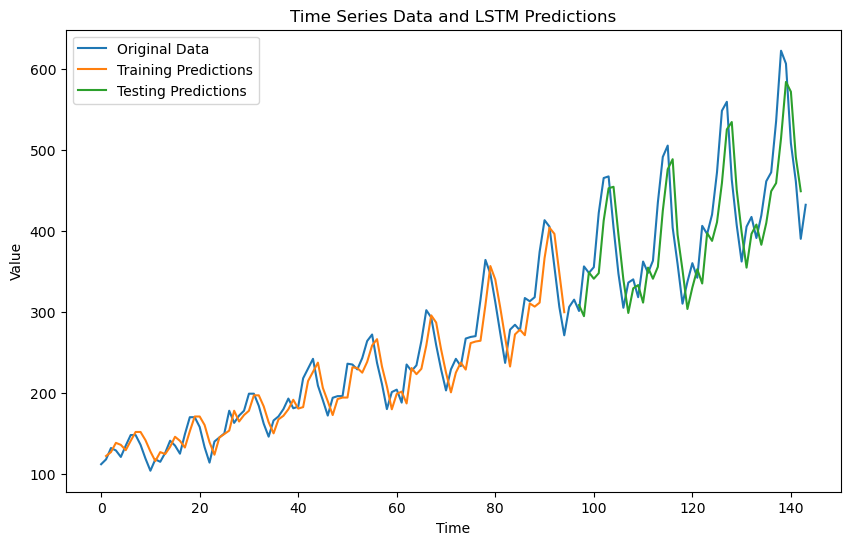

In [45]:
# Plot baseline and predictions with labels and legends
plt.figure(figsize=(10, 6))

# Plot the original dataset
plt.plot(scaler.inverse_transform(dataset), label='Original Data')

# Plot the training predictions
plt.plot(trainPredictPlot, label='Training Predictions')

# Plot the testing predictions
plt.plot(testPredictPlot, label='Testing Predictions')

# Add a title and labels for clarity
plt.title('Time Series Data and LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Value')

# Show the legend to differentiate lines
plt.legend()

# Display the plot
plt.show()
